# Results of TSD, DANN, SCADANN models across 5 subjects starting at  subject_0+1+2+3 while wearing at neutral location


Library used can be downloaded from https://github.com/aonai/long_term_EMG_myo   
&emsp; Original by UlysseCoteAllard https://github.com/UlysseCoteAllard/LongTermEMG   
Dataset recorded by https://github.com/Suguru55/Wearable_Sensor_Long-term_sEMG_Dataset   
Extended robot project can be found in https://github.com/aonai/myo_robot_arm

### Notes
* weights for TSD are total of 15 training models, 5 for each wearing location
* weights for DANN and SCADANN are total of 12 trianing models, 4 for each wearing location


* training examples should have shape (1, 2,)
* first session has shape (160, 572, 252)
* the following sessions have shape (40, 572, 252)
* training labels should have shape (1, 2, )


* location 0, 1, and 2 corresponds to neutral position, inward rotation, and outward rotation respectively
* session mentioned below are subjects, so number of sessions is 5

In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd

In [2]:
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
os.chdir(code_dir)
from PrepareAndLoadData.process_data import read_data_training

# 0. Prepare Data
use `switch=1` to train across subjects and individually on each wearing location

### specify the directories used for running the code:
* `code_diar`: path to long_term_EMG_myo library
* `data_dir`: where raw dataset is loaded; raw data is in csv format
* `processed_data_dir`: where processed dataset is loaded; processed data is in npy pickle format
    * processed data should be a ndarray of shape   
    (controlling_factor_1 x controlling_factor_2 x num_sessions_per_gesture x #examples_window*#mov(26*22=572) x processed_channel_shape(252 for TSD, (4,8,10) for ConvNet)
* `path_<model_name>`: where model weights are saved
    * weights should be saved in folder `/Weights/<model_name>`. Each folder has subfolders containing weights for the first controlling factor.
    * weights for base model (TSD or ConvNet) contain m set of training model
    * weights for DANN and SCADANN contain m-1 set of trianing model (these models are trianed based on TSD, so they do not have a best_state_0.pt model). 
* `save_<model_name>`: where model results are saved
    * each result for testing a model on a group of dataset is saved in folder `results`. Each result has corresponding 
        * `<model_name>.txt` includes predictions, ground truths, array of accuracies for each participant and each session, and overall accuracy
        * `predictions_<model_name>.npy` includes array of accuracies, ground truths, predictions, and model outputs (probability array for each prediction)
        * remember to make blank files in these names before saving



* use `read_data_training` to process raw dataset
        

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_all_across_sub_lump4"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_sub_lump4/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_sub_lump4/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_sub_lump4/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
# read_data_training(path=data_dir, store_path = processed_data_dir, switch=1, \
#                    include_in_first=4, sessions_to_include =[0])

Loading and preparing Training datasets...
index_participant_list  [1, 2, 3, 4, 5]
session  0  --- process data in days  [1, 4, 9, 10, 12, 13, 19, 26, 27, 29]
READ  Sub 1 _Loc 0 _Day 1
READ  Sub 1 _Loc 0 _Day 4
READ  Sub 1 _Loc 0 _Day 9
READ  Sub 1 _Loc 0 _Day 10
READ  Sub 1 _Loc 0 _Day 12
READ  Sub 1 _Loc 0 _Day 13
READ  Sub 1 _Loc 0 _Day 19
READ  Sub 1 _Loc 0 _Day 26
READ  Sub 1 _Loc 0 _Day 27
READ  Sub 1 _Loc 0 _Day 29
@ traning sessions =  (1, 40, 572, 252)
session  0  --- process data in days  [1, 4, 9, 10, 12, 13, 19, 26, 27, 29]
READ  Sub 2 _Loc 0 _Day 1
READ  Sub 2 _Loc 0 _Day 4
READ  Sub 2 _Loc 0 _Day 9
READ  Sub 2 _Loc 0 _Day 10
READ  Sub 2 _Loc 0 _Day 12
READ  Sub 2 _Loc 0 _Day 13
READ  Sub 2 _Loc 0 _Day 19
READ  Sub 2 _Loc 0 _Day 26
READ  Sub 2 _Loc 0 _Day 27
READ  Sub 2 _Loc 0 _Day 29
Include sub  2  in first dataset  (40, 572, 252)
examples of first session =  (80, 572)
@ traning sessions =  (1, 80, 572, 252)
session  0  --- process data in days  [1, 4, 9, 10, 12, 13, 19,

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


@ traning sessions =  (2,)
traning examples  (2,)
traning labels  (2,)
all traning examples  (1, 2)
all traning labels  (1, 2)


In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 2)
traning labels  (1, 2)


In [6]:
for idx, examples_per_session in enumerate (examples_datasets_train[0]):
    print(idx, " examples_per_session = ", np.shape(examples_per_session))
    print(idx, " labels_per_session = ", np.shape(labels_datasets_train[0][idx]))

0  examples_per_session =  (160, 572, 252)
0  labels_per_session =  (160, 572)
1  examples_per_session =  (40, 572, 252)
1  labels_per_session =  (40, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each linear layer (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 40 for myo
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal; i.e. size of one training example 
    * 252 for TSD
* `learning_rate`= 0.002515
    

In [7]:
num_kernels=[200, 200, 200]                                
number_of_cycle_for_first_training = np.shape(examples_datasets_train[0][0])[0]               
number_of_cycles_total=np.shape(examples_datasets_train[-1][-1])[0]               
print("number_of_cycle_for_first_training ", number_of_cycle_for_first_training)
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     
learning_rate=0.002515

number_of_cycle_for_first_training  160
number_of_cycles_total  40


# 1. TSD_DNN
* `train_fine_tuning`: used to train data using a base model (TSD or ConvNet)
    * running this function will save num_sessions sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_standard_model_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (num_session x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have num_sessions sets of dataloaders, each correspond to one session
   

In [8]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [9]:
# train_fine_tuning(examples_datasets_train, labels_datasets_train,
#                   num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
#                   number_of_classes=number_of_classes, 
#                   number_of_cycles_total=number_of_cycles_total,
#                   number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#                   batch_size=batch_size,
#                   feature_vector_input_length=feature_vector_input_length,
#                   learning_rate=learning_rate)

GET one participant_examples  (2,)
   GET one training_index_examples  (160, 572, 252)  at  0
   GOT one group XY  (91520, 252)    (91520,)
       one group XY test  (0,)    (0,)
       one group XY train (82368, 252)    (82368,)
       one group XY valid (9152, 252)    (9152, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (0,)    (0,)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 0)
START TRAINING
Participant:  0
Session:  0
<generator object Module.parameters at 0x7f7cfc03e5f0>
Epoch 0/499
----------
train Loss: 0.00798791 Acc: 0.63690708
val Loss: 0.00007144 Acc: 0.76660839
New best validation loss: 7.144057589185822e-05
Epoch 1 of 500 took 4.201s
Epoch 1/499
----------
train Loss: 0.00612848 Acc: 0.71550593
val Loss: 0.00006608 Acc: 0.78496503
Epoch 2 of 500 took 4.180s
Epoch 2/

In [10]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (2,)
   GET one training_index_examples  (160, 572, 252)  at  0
   GOT one group XY  (91520, 252)    (91520,)
       one group XY test  (22880, 252)    (22880, 252)
       one group XY train (82368, 252)    (82368,)
       one group XY valid (9152, 252)    (9152, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 2)
0  SESSION   data =  22880
Participant:  0  Accuracy:  0.7699737762237763
1  SESSION   data =  5720
Participant:  0  Accuracy:  0.3814685314685315
ACCURACY PARTICIPANT  0 :  [0.7699737762237763, 0.3814685314685315]
[array([0.76997378, 0.38146853])]
OVERALL ACCURACY: 0.5757211538461539


In [11]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
index_participant_list = ['0~3', 4]
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Participant_{i}' for i in index_participant_list],
                        columns = [f'Loc_{j}' for j in range(TSD_acc.shape[0])])
TSD_df

,Loc_0
Participant_0~3,0.769974
Participant_4,0.381469


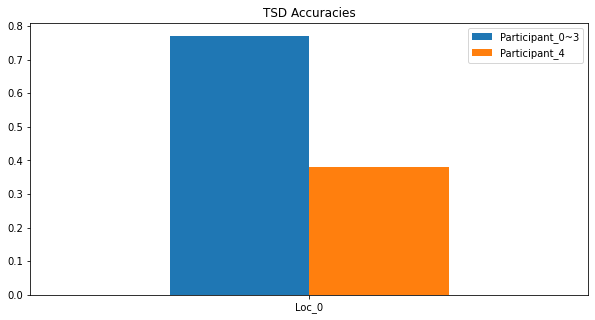

In [12]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [13]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [14]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Loc"
n_name = "Sub0~3->"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 2)
predictions =  (1, 2)
index_participant_list  ['0~3', 4]
accuracies_gestures =  (22, 2)


,Unnamed: 0,Loc0_Sub0~3->0~3,Loc0_Sub0~3->4
0,M0,0.981731,0.988462
1,M1,0.592308,0.650000
2,M2,0.926923,0.219231
3,M3,0.881731,0.615385
4,M4,0.719231,0.011538
5,M5,0.879808,0.646154
6,M6,0.927885,0.811538
7,M7,0.642308,0.080769
8,M8,0.873077,0.269231
9,M9,0.672115,0.092308


# 2. DANN
* `train_DANN`: train DANN model using the first set of training weights from base model
    * num_sessions-1 sets of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [16]:
# train_DANN(examples_datasets_train, labels_datasets_train, 
#           num_kernels=num_kernels,
#           path_weights_fine_tuning=path_TSD,
#           number_of_classes=number_of_classes,
#           number_of_cycles_total = number_of_cycles_total,
#           number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#           batch_size=batch_size,
#           feature_vector_input_length=feature_vector_input_length,
#           path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

GET one participant_examples  (2,)
   GET one training_index_examples  (160, 572, 252)  at  0
   GOT one group XY  (91520, 252)    (91520,)
       one group XY test  (0,)    (0,)
       one group XY train (82368, 252)    (82368,)
       one group XY valid (9152, 252)    (9152, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (0,)    (0,)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 0)
SHAPE SESSIONS:  (2,)
()
=> loading checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_sub_lump4/TSD/participant_0/best_state_0.pt'
Loading Optimizer
=> loaded checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_sub_lump4/TSD/participant_0/best_state_0.pt' (epoch 1)
STARTING

Accuracy source 0.787891, main loss classifier 0.362860, source classification loss 0.592858, loss domain distinction 0.177329, accuracy domain distinction 0.500000
VALIDATION Loss: 1.13557208 Acc: 0.64936626
Epoch 30 of 500 took 2.414s
Accuracy source 0.791846, main loss classifier 0.357186, source classification loss 0.581409, loss domain distinction 0.177425, accuracy domain distinction 0.500000
VALIDATION Loss: 1.20751858 Acc: 0.65472028
Epoch 31 of 500 took 2.422s
Accuracy source 0.786621, main loss classifier 0.366418, source classification loss 0.600048, loss domain distinction 0.176961, accuracy domain distinction 0.500000
VALIDATION Loss: 1.10316300 Acc: 0.66586538
Epoch 32 of 500 took 2.367s
Accuracy source 0.785693, main loss classifier 0.365195, source classification loss 0.597563, loss domain distinction 0.177136, accuracy domain distinction 0.500000
VALIDATION Loss: 1.50396550 Acc: 0.60576923
Epoch 33 of 500 took 2.309s
Accuracy source 0.789844, main loss classifier 0.357

In [17]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (2,)
   GET one training_index_examples  (160, 572, 252)  at  0
   GOT one group XY  (91520, 252)    (91520,)
       one group XY test  (22880, 252)    (22880, 252)
       one group XY train (82368, 252)    (82368,)
       one group XY valid (9152, 252)    (9152, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 2)
(2,)
Participant ID:  0  Session ID:  0  Accuracy:  0.7699737762237763
Participant ID:  0  Session ID:  1  Accuracy:  0.5907342657342657
ACCURACY PARTICIPANT:  [0.7699737762237763, 0.5907342657342657]
[[0.76997378 0.59073427]]
[array([0.76997378, 0.59073427])]
OVERALL ACCURACY: 0.680354020979021


In [18]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Participant_{i}' for i in index_participant_list],
                        columns = [f'Loc_{j}' for j in range(DANN_acc.shape[0])])
DANN_df

,Loc_0
Participant_0~3,0.769974
Participant_4,0.590734


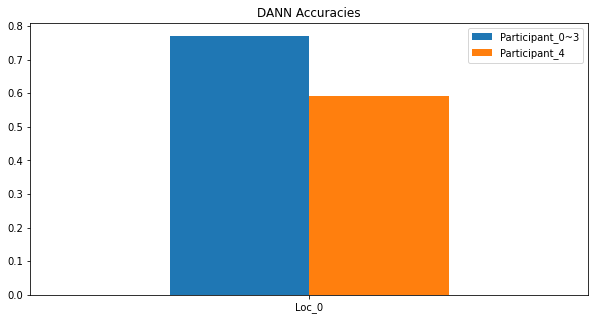

In [19]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

In [20]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_DANN, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list)
df = pd.read_csv(save_DANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 2)
predictions =  (1, 2)
index_participant_list  ['0~3', 4]
accuracies_gestures =  (22, 2)


,Unnamed: 0,Loc0_Sub0~3->0~3,Loc0_Sub0~3->4
0,M0,0.981731,1.000000
1,M1,0.592308,0.823077
2,M2,0.926923,0.646154
3,M3,0.881731,0.719231
4,M4,0.719231,0.342308
5,M5,0.879808,0.773077
6,M6,0.927885,0.503846
7,M7,0.642308,0.661538
8,M8,0.873077,0.430769
9,M9,0.672115,0.534615


# 3. SCADANN

* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels: 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * num_sessions-1 sets of training weights will be saved


In [21]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import \
    run_SCADANN_training_sessions, test_network_SCADANN

In [22]:
# percentage_same_gesture_stable = 0.75 
# run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
#                               num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
#                               path_weights_to_save_to=path_SCADANN,
#                               path_weights_Adversarial_training=path_DANN,
#                               path_weights_Normal_training=path_TSD,
#                               number_of_cycles_total = number_of_cycles_total, 
#                               number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#                               number_of_classes=number_of_classes,
#                               learning_rate=learning_rate)

GET one participant_examples  (2,)
   GET one training_index_examples  (160, 572, 252)  at  0
   GOT one group XY  (91520, 252)    (91520,)
       one group XY test  (0,)    (0,)
       one group XY train (91520, 252)    (91520,)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (0,)    (0,)
       one group XY train (22880, 252)    (22880,)
dataloaders: 
   train  (1, 2)
   valid  (0,)
   test  (1, 0)
participants_train =  1
Optimizer =  <generator object Module.parameters at 0x7f7cfb69e900>
=> loading checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_sub_lump4/DANN/participant_0/best_state_1.pt'
Loading Optimizer
=> loaded checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_sub_lump4/DANN/participant_0/best_state_1.pt' (epoch 25)
=> loading checkpoint '/home/laiy/gitrepos/msr

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


BEFORE:  0.5384615384615384   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.11538461538461539   AFTER:  0.0  len before:  26   len after:  17
BEFORE:  0.6923076923076923   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.4230769230769231   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.4230769230769231   AFTER:  0.4230769230769231  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.15384615384615385  len before:  26   len after

BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  9
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  0.4444444444444444  len before:  26   len after:  9
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.11538461538461539   AFTER:  nan  len before:  26   len after:  0
BEFORE:  0.2692307692307692   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.8888888888888888  len before:  26   len after:  9
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  1.0  len before:  26   len after:  5
BEFORE:  0.5769230769230769   AFTER:  0.5769230769230769  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len

STARTING TRAINING
Accuracy total 0.784367, main loss classifier 0.755536, source accuracy 0.775400 source classification loss 0.631697, target accuracy 0.793334 target loss 0.669598 accuracy domain distinction 0.500000 loss domain distinction 1.048884,
VALIDATION Loss: 0.41728364 Acc: 0.87423124
New best validation loss:  0.41728364457102385
Epoch 2 of 500 took 2.696s
Accuracy total 0.794681, main loss classifier 0.723666, source accuracy 0.775400 source classification loss 0.638775, target accuracy 0.813962 target loss 0.603706 accuracy domain distinction 0.500000 loss domain distinction 1.024257,
VALIDATION Loss: 0.55148096 Acc: 0.8299508
Epoch 3 of 500 took 2.692s
Accuracy total 0.796144, main loss classifier 0.711445, source accuracy 0.774323 source classification loss 0.636196, target accuracy 0.817965 target loss 0.581793 accuracy domain distinction 0.500000 loss domain distinction 1.024503,
VALIDATION Loss: 0.40639625 Acc: 0.89298893
New best validation loss:  0.4063962543127583

In [23]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (2,)
   GET one training_index_examples  (160, 572, 252)  at  0
   GOT one group XY  (91520, 252)    (91520,)
       one group XY test  (22880, 252)    (22880, 252)
       one group XY train (82368, 252)    (82368,)
       one group XY valid (9152, 252)    (9152, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 2)
Participant:  0  Accuracy:  0.7699737762237763
Participant:  0  Accuracy:  0.6260489510489511
ACCURACY PARTICIPANT:  [0.7699737762237763, 0.6260489510489511]
[[0.76997378 0.62604895]]
[array([0.76997378, 0.62604895])]
OVERALL ACCURACY: 0.6980113636363636


In [24]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Participant_{i}' for i in index_participant_list],
                        columns = [f'Loc_{j}' for j in range(SCADANN_acc.shape[0])])
SCADANN_df

,Loc_0
Participant_0~3,0.769974
Participant_4,0.626049


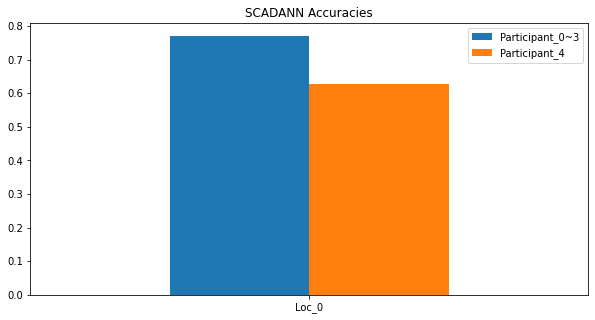

In [25]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

In [26]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_SCADANN, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list)
df = pd.read_csv(save_SCADANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 2)
predictions =  (1, 2)
index_participant_list  ['0~3', 4]
accuracies_gestures =  (22, 2)


,Unnamed: 0,Loc0_Sub0~3->0~3,Loc0_Sub0~3->4
0,M0,0.981731,1.000000
1,M1,0.592308,0.830769
2,M2,0.926923,0.788462
3,M3,0.881731,0.776923
4,M4,0.719231,0.369231
5,M5,0.879808,0.823077
6,M6,0.927885,0.603846
7,M7,0.642308,0.707692
8,M8,0.873077,0.423077
9,M9,0.672115,0.569231


# Conclusion
Suppose there is a ndarray of NxM dataloaders, then N group of models will be trained, and each group will have M model. Each group is independent of the other, and each model within a group is dependent on its previous training weights.

In general, overall accuracies of SCADANN are better than DANN, and DANN is better than TSD.
Occasionally accuracies of SCADANN end up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducible if processed dataset sticks to the shape defined above.  

The amount of increase in accuracies from DANN to SCADANN looks random. But if the base model is better at classifying one session, then its corresponding SCADANN is also better at classifying the same session. Given such result, to obtain the best performance from SCADANN, a good model trained with good data should be the starting point.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correclty

Below is the accumulative accuracies of individual participant over all sessions. In general, SCADANN increase performance. Accuracy over all participants is dependant on how good participant_0 model is when testing on other participants.

In [27]:
accu_acc_TSD = []
accu_acc_DANN = []
accu_acc_SCADANN = []

for i in range(1,DANN_acc.shape[1]+1):
    accu_acc_TSD.append(np.mean(TSD_acc[:,:i]))
    accu_acc_DANN.append(np.mean(DANN_acc[:,:i]))
    accu_acc_SCADANN.append(np.mean(SCADANN_acc[:,:i]))

accu_df = pd.DataFrame([accu_acc_TSD, accu_acc_DANN, accu_acc_SCADANN],
                      index = ["TSD", "DANN", "SCADANN"],
                     columns =[f'Participant_{i}' for i in index_participant_list])
accu_df

,Participant_0~3,Participant_4
TSD,0.769974,0.575721
DANN,0.769974,0.680354
SCADANN,0.769974,0.698011


In [28]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Loc_0
Participant_0~3,0.769974
Participant_4,0.381469


DANN


,Loc_0
Participant_0~3,0.769974
Participant_4,0.590734


SCADANN


,Loc_0
Participant_0~3,0.769974
Participant_4,0.626049


In [29]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Participant_'+index_participant_list[0])
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/across_sub0_lump4_diff.csv')

,Loc_0
Participant_4,0.24458


In [30]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.575721
DANN,0.680354
SCADANN,0.698011


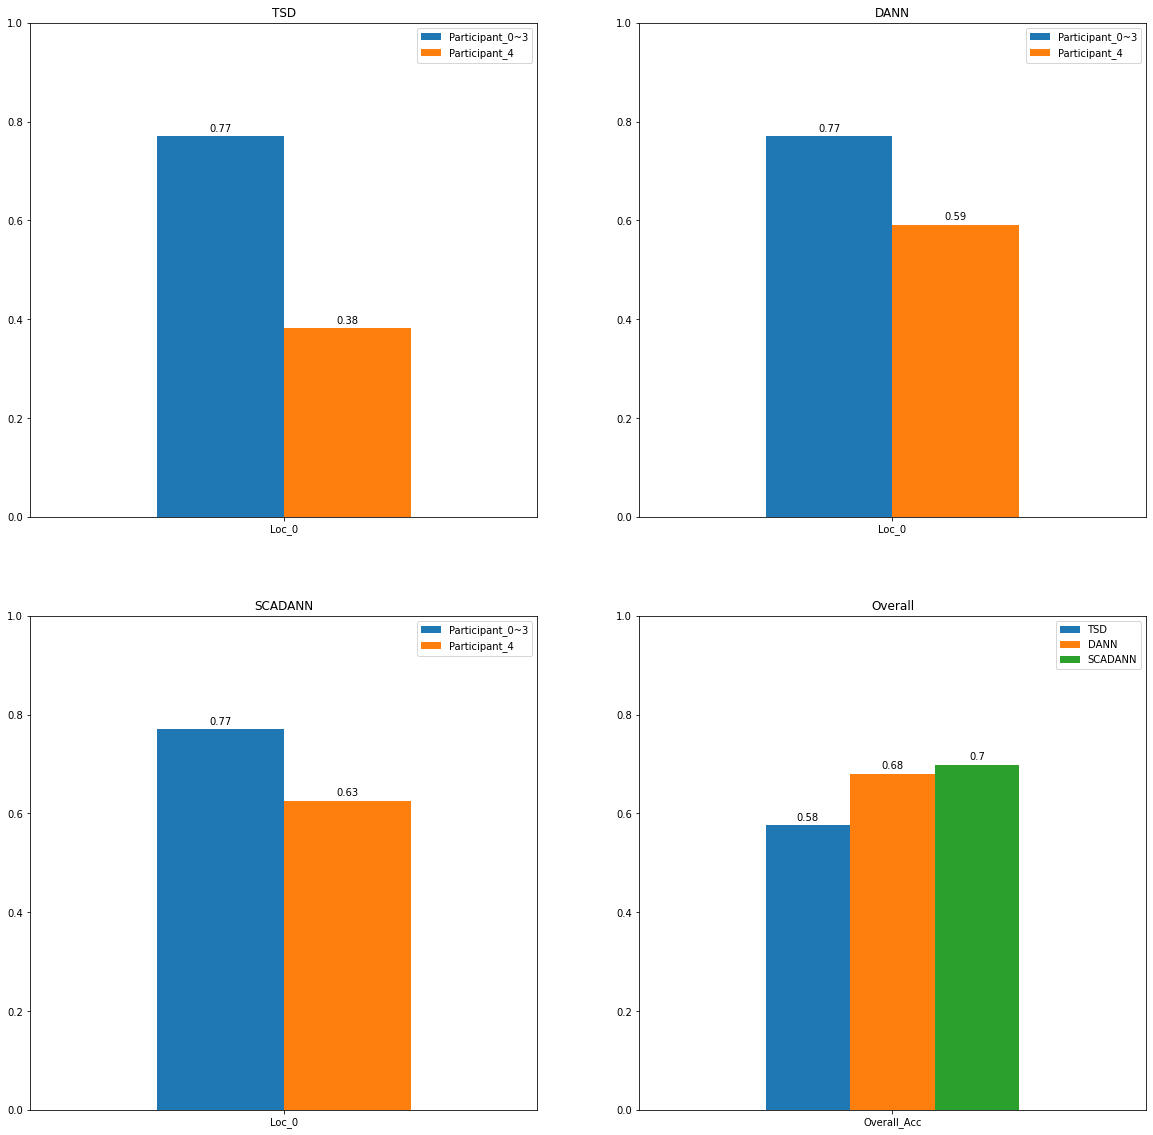

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 8),textcoords='offset points')
        